# Data Cleaning or Cleansing

Whenever we have to work with a real world dataset, the first problem that we face is to clean it. The real world dataset never comes clean. It consists lot of discrepancies in the dataset. So, we have to clean the dataset for further processing.

Cleaning data is the process of preparing the dataset for analysis. It is very important because the accuracy of machine learning or data mining models are affected because of poor quality of data.

So, data scientists spend a large amount of their time cleaning the dataset and transform them into a format with which they can work with. In fact, data scientists spend 80% of their time cleaning the data.

A very common scenario is that the dataset contains missing values coded as NaN. Also, the missing values are coded in different ways. The dataset may contain negative or invalid values. It may contain outliers. It may be in the untidy format. All of these are examples of a messy dataset.

In this project, I present several useful ways to handle these discrepancies in the dataset.

## 1) Import the required Python libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

## 2) Read Data

In [17]:
df = pd.read_csv('corona.csv', sep=',',na_values=["xx","?"])

In [18]:
df.head(10)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Chongqing,China,female,44.0,1/15/2020,...,0,NaN,Chongqing Municipal Health Commission,http://wsjkw.cq.gov.cn/tzgg/20200121/249730.html,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Sichuan,China,male,34.0,01/11/20,...,0,NaN,央视新闻,https://m.weibo.cn/status/4463300522087848?,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,37.0,1/14/2020,...,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,39.0,01/09/20,...,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,56.0,1/16/2020,...,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   Unnamed: 3             0 non-null      float64
 4   summary                1080 non-null   object 
 5   location               1085 non-null   object 
 6   country                1085 non-null   object 
 7   gender                 902 non-null    object 
 8   age                    843 non-null    float64
 9   symptom_onset          563 non-null    object 
 10  If_onset_approximated  560 non-null    float64
 11  hosp_visit_date        507 non-null    object 
 12  exposure_start         128 non-null    object 
 13  exposure_end           341 non-null    object 
 14  visiting Wuhan         1085 non-null   int64  
 15  from

In [20]:
df.describe()

,id,case_in_country,Unnamed: 3,age,If_onset_approximated,visiting Wuhan,from Wuhan,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
count,1085.000000,888.000000,0.0,843.000000,560.000000,1085.000000,1081.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,543.000000,48.841216,NaN,49.483689,0.042857,0.176959,0.144311,NaN,NaN,NaN,NaN,NaN,NaN
std,313.356825,78.853528,NaN,18.255334,0.202716,0.381810,0.351567,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,0.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,272.000000,11.000000,NaN,35.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,543.000000,28.000000,NaN,51.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,814.000000,67.250000,NaN,64.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1085.000000,1443.000000,NaN,96.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df['visiting Wuhan'].value_counts()

0    893
1    192
Name: visiting Wuhan, dtype: int64

**Some feature engineering**

In [22]:
df.drop('Unnamed: 25', axis=1, inplace=True)
df.head(10)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN
5,6,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Chongqing,China,female,44.0,1/15/2020,...,0,0,NaN,Chongqing Municipal Health Commission,http://wsjkw.cq.gov.cn/tzgg/20200121/249730.html,NaN,NaN,NaN,NaN,NaN
6,7,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Sichuan,China,male,34.0,01/11/20,...,0,0,NaN,央视新闻,https://m.weibo.cn/status/4463300522087848?,NaN,NaN,NaN,NaN,NaN
7,8,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,37.0,1/14/2020,...,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN
8,9,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,39.0,01/09/20,...,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN
9,10,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,56.0,1/16/2020,...,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   Unnamed: 3             0 non-null      float64
 4   summary                1080 non-null   object 
 5   location               1085 non-null   object 
 6   country                1085 non-null   object 
 7   gender                 902 non-null    object 
 8   age                    843 non-null    float64
 9   symptom_onset          563 non-null    object 
 10  If_onset_approximated  560 non-null    float64
 11  hosp_visit_date        507 non-null    object 
 12  exposure_start         128 non-null    object 
 13  exposure_end           341 non-null    object 
 14  visiting Wuhan         1085 non-null   int64  
 15  from

In [24]:
df.describe()

,id,case_in_country,Unnamed: 3,age,If_onset_approximated,visiting Wuhan,from Wuhan,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 26
count,1085.000000,888.000000,0.0,843.000000,560.000000,1085.000000,1081.000000,0.0,0.0,0.0,0.0,0.0
mean,543.000000,48.841216,NaN,49.483689,0.042857,0.176959,0.144311,NaN,NaN,NaN,NaN,NaN
std,313.356825,78.853528,NaN,18.255334,0.202716,0.381810,0.351567,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,0.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,272.000000,11.000000,NaN,35.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,543.000000,28.000000,NaN,51.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,814.000000,67.250000,NaN,64.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
max,1085.000000,1443.000000,NaN,96.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN


**Problems**
- Weight, height, spend_A, spend_B, spend_C are not shown in describe because they are not numeric

## 3) Start Cleaning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   Unnamed: 3             0 non-null      float64
 4   summary                1080 non-null   object 
 5   location               1085 non-null   object 
 6   country                1085 non-null   object 
 7   gender                 902 non-null    object 
 8   age                    843 non-null    float64
 9   symptom_onset          563 non-null    object 
 10  If_onset_approximated  560 non-null    float64
 11  hosp_visit_date        507 non-null    object 
 12  exposure_start         128 non-null    object 
 13  exposure_end           341 non-null    object 
 14  visiting Wuhan         1085 non-null   int64  
 15  from

In [26]:
df.head(10)


,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN
5,6,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Chongqing,China,female,44.0,1/15/2020,...,0,0,NaN,Chongqing Municipal Health Commission,http://wsjkw.cq.gov.cn/tzgg/20200121/249730.html,NaN,NaN,NaN,NaN,NaN
6,7,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Sichuan,China,male,34.0,01/11/20,...,0,0,NaN,央视新闻,https://m.weibo.cn/status/4463300522087848?,NaN,NaN,NaN,NaN,NaN
7,8,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,37.0,1/14/2020,...,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN
8,9,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,39.0,01/09/20,...,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN
9,10,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,56.0,1/16/2020,...,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN


first start with changing columns data type for the right one and using **errors='coerce'** you will be sure any data that not in format will be NaN

In [68]:

df["symptom_onset"] = pd.to_datetime(df["symptom_onset"], errors='coerce')


In [28]:
df.head(10)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-03,...,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,...,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,2020-01-04,...,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaT,...,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaT,...,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN
5,6,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Chongqing,China,female,44.0,2020-01-15,...,0,0,NaN,Chongqing Municipal Health Commission,http://wsjkw.cq.gov.cn/tzgg/20200121/249730.html,NaN,NaN,NaN,NaN,NaN
6,7,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Sichuan,China,male,34.0,2020-01-11,...,0,0,NaN,央视新闻,https://m.weibo.cn/status/4463300522087848?,NaN,NaN,NaN,NaN,NaN
7,8,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,37.0,2020-01-14,...,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN
8,9,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,39.0,2020-01-09,...,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN
9,10,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,56.0,2020-01-16,...,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     1085 non-null   int64         
 1   case_in_country        888 non-null    float64       
 2   reporting date         1084 non-null   object        
 3   Unnamed: 3             0 non-null      float64       
 4   summary                1080 non-null   object        
 5   location               1085 non-null   object        
 6   country                1085 non-null   object        
 7   gender                 902 non-null    object        
 8   age                    843 non-null    float64       
 9   symptom_onset          563 non-null    datetime64[ns]
 10  If_onset_approximated  560 non-null    float64       
 11  hosp_visit_date        507 non-null    object        
 12  exposure_start         128 non-null    object        
 13  exp

In [30]:
df.describe()

,id,case_in_country,Unnamed: 3,age,If_onset_approximated,visiting Wuhan,from Wuhan,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 26
count,1085.000000,888.000000,0.0,843.000000,560.000000,1085.000000,1081.000000,0.0,0.0,0.0,0.0,0.0
mean,543.000000,48.841216,NaN,49.483689,0.042857,0.176959,0.144311,NaN,NaN,NaN,NaN,NaN
std,313.356825,78.853528,NaN,18.255334,0.202716,0.381810,0.351567,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,0.250000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,272.000000,11.000000,NaN,35.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,543.000000,28.000000,NaN,51.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,814.000000,67.250000,NaN,64.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
max,1085.000000,1443.000000,NaN,96.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN


**Problems**
- Weight column has xx and ? values that's aren't correct, also there is -60 kg and that's wrong.
- Height column has min value of 0 and that's wrong also.
- Spend_B columns has min value of -100 that make no sense.

## Some Visualizations

In [31]:
df.head(10)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,death,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,2020-01-03,...,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,2020-01-15,...,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,2020-01-04,...,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaT,...,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaT,...,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN
5,6,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Chongqing,China,female,44.0,2020-01-15,...,0,0,NaN,Chongqing Municipal Health Commission,http://wsjkw.cq.gov.cn/tzgg/20200121/249730.html,NaN,NaN,NaN,NaN,NaN
6,7,NaN,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Sichuan,China,male,34.0,2020-01-11,...,0,0,NaN,央视新闻,https://m.weibo.cn/status/4463300522087848?,NaN,NaN,NaN,NaN,NaN
7,8,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,37.0,2020-01-14,...,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN
8,9,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,39.0,2020-01-09,...,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN
9,10,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,56.0,2020-01-16,...,0,0,NaN,Beijing Municipal Health Commission,http://wjw.beijing.gov.cn/xwzx_20031/wnxw/2020...,NaN,NaN,NaN,NaN,NaN


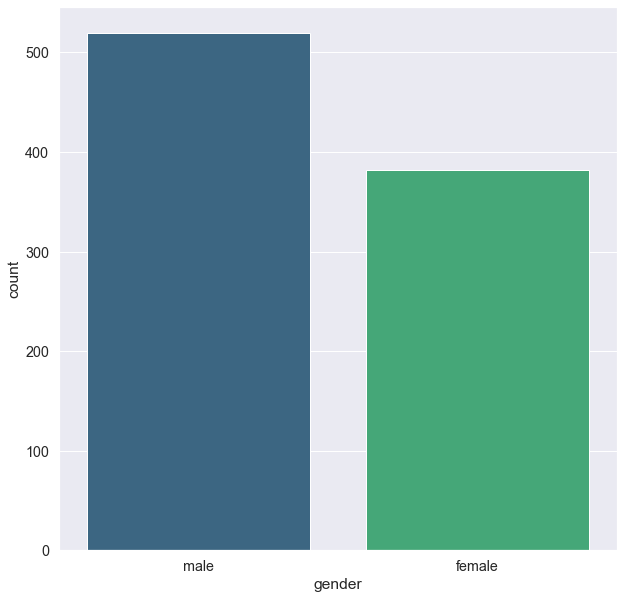

In [32]:
sns.countplot(x='gender', data=df, palette='viridis')

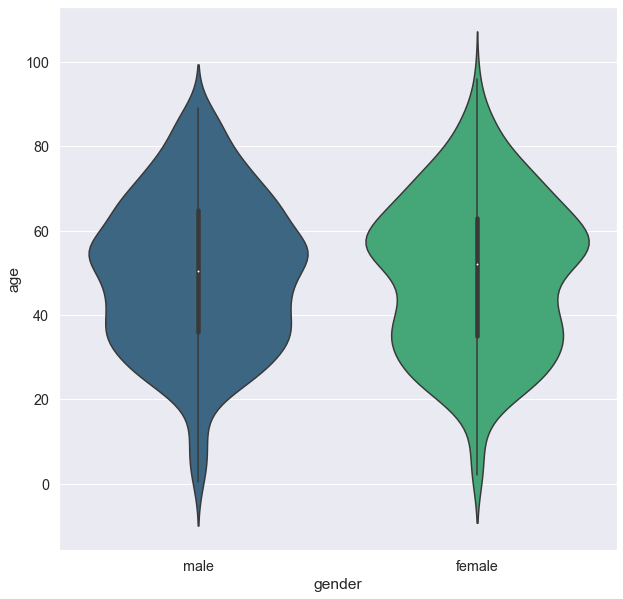

In [33]:
sns.violinplot(x='gender', y='age', data=df, palette='viridis')

In [34]:
for col in df.columns:
    print(f'For column {col}\n------------------\n')
    print(df[col].value_counts())
    print('\n')

For column id
------------------

1085    1
356     1
370     1
369     1
368     1
       ..
718     1
717     1
716     1
715     1
1       1
Name: id, Length: 1085, dtype: int64


For column case_in_country
------------------

1.0      37
2.0      24
3.0      22
6.0      19
9.0      19
         ..
149.0     1
147.0     1
141.0     1
135.0     1
140.0     1
Name: case_in_country, Length: 197, dtype: int64


For column reporting date
------------------

2/27/2020    91
2/20/2020    73
1/22/2020    61
2/26/2020    54
1/25/2020    52
2/25/2020    46
2/19/2020    42
1/24/2020    41
2/21/2020    35
2/24/2020    33
2/22/2020    31
1/27/2020    28
1/31/2020    28
2/23/2020    26
02/08/20     26
2/28/2020    25
1/23/2020    24
1/26/2020    24
02/04/20     24
02/06/20     24
1/30/2020    23
02/05/20     22
2/14/2020    21
1/29/2020    20
02/09/20     19
02/10/20     19
1/21/2020    18
2/13/2020    18
1/28/2020    18
2/16/2020    16
2/17/2020    14
2/15/2020    13
02/11/20     13
2/18/2020    

In [35]:
df.isnull().sum()

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
source                      0
link                        0
Unnamed: 21              1085
Unnamed: 22              1085
Unnamed: 23              1085
Unnamed: 24              1085
Unnamed: 26              1085
dtype: int64

In [36]:
df['case_in_country'].isnull().sum()

197

In [37]:
df['case_in_country'].mean()

48.84121621621622

In [38]:
df['case_in_country'].fillna(df['case_in_country'].mean(), inplace=True)

In [39]:
df['case_in_country'].isnull().sum()

0

In [40]:
df['symptom_onset'].isnull().sum()

522

In [41]:
df['symptom_onset'].mode()[0]

Timestamp('2020-01-23 00:00:00')

In [42]:
df['symptom_onset'].fillna(df['symptom_onset'].mode()[0], inplace=True)

In [43]:
df['symptom_onset'].isnull().sum()

0

In [45]:
df["gender"].value_counts()

male      520
female    382
Name: gender, dtype: int64

In [48]:
df["gender"].mode()[0]

'male'

In [57]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

In [59]:
df['age'] = imputer.fit_transform(df[['age']])
df['age'].isnull().sum()

0

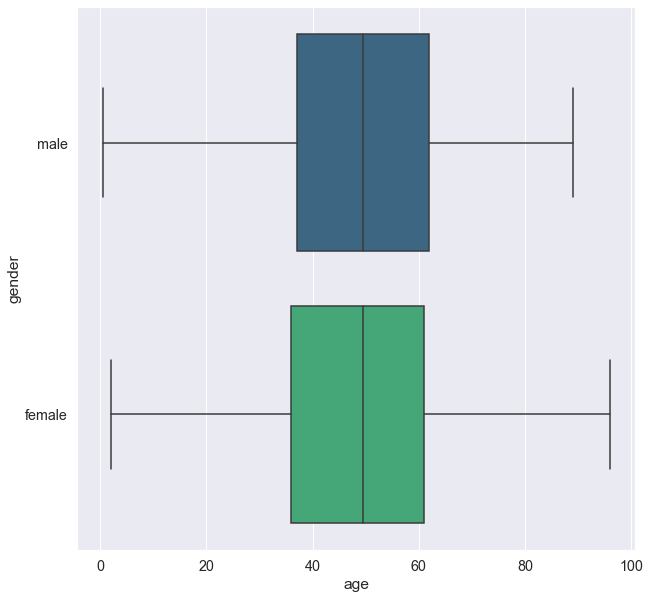

In [63]:
sns.boxplot(x='age', y='gender', data=df, palette='viridis')

In [ ]:
df1=df.sort_values('')